Python ML Project End to End

ML project steps
1. Problem Statement
2. Data Collection
3. Data check
4. EDA
5. Data pre-Processing
6. Model Training

In [3]:
# import all required libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Read input file

In [4]:
df = pd.read_csv('data/stud.csv')

Show First 5 row of df

In [6]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of Df

In [7]:
df.shape

(1000, 8)

# Dataset Information

1. gender - male/female
2. race_ethnicity - Group A, B, C, D, E
3. parental_level_of_education - bachelor's degree, master's degree, associate's degree, some college
4. lunch - having lunch before standard, free/reduced
5. test_preparation_course - Complete or not before test
6. math_score - 
7. reading_score
8. writing score

# Data Check Information

1. check missing values
2. check duplicates
3. check data redundancy
4. unique values for each column
5. statistical data of dataset
6. check various categories present in dataset 

## 3.1 check missing values

In [9]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no null values available in df

## 3.2 check Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Check unique values

In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 check statistics of data

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


mean is very close to each other

the minium score for math is 0, reading - 17 and writing - 10

## 3.7 Data Exploratary

In [17]:
print("categories of gender")
print(df['gender'].unique())

print("categories of race_ethnicity")
print(df['race_ethnicity'].unique())

print("categories of parental_level_of_education")
print(df['parental_level_of_education'].unique())

print("categories of lunch")
print(df['lunch'].unique())

print("categories of test_preparation_course")
print(df['test_preparation_course'].unique())


categories of gender
['female' 'male']
categories of race_ethnicity
['group B' 'group C' 'group A' 'group D' 'group E']
categories of parental_level_of_education
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories of lunch
['standard' 'free/reduced']
categories of test_preparation_course
['none' 'completed']


Identify categorical and numerical 

In [23]:
numerical_var = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_var = [feature for feature in df.columns if df[feature].dtype == "O"]
print("For this df there is {} categorical data they are {}".format(len(categorical_var), categorical_var))
print("For this df there is {} numerical data they are {}".format(len(numerical_var), numerical_var))

For this df there is 5 categorical data they are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
For this df there is 3 numerical data they are ['math_score', 'reading_score', 'writing_score']


## 3.8 Adding total score and average score

In [24]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = df['total_score']/3
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
reading_full = df[df['reading_score'] == 100]['avg_score'].count()
writing_full = df[df['writing_score'] == 100]['avg_score'].count()
math_full = df[df['math_score'] == 100]['avg_score'].count()

print(f"No of student who scored 1oo in reading {reading_full}")
print(f"No of student who scored 1oo in writing {writing_full}")
print(f"No of student who scored 1oo in math {math_full}")

No of student who scored 1oo in reading 17
No of student who scored 1oo in writing 14
No of student who scored 1oo in math 7


In [31]:
reading_full = df[df['reading_score'] <= 20]['avg_score'].count()
writing_full = df[df['writing_score'] <= 20]['avg_score'].count()
math_full = df[df['math_score'] <= 20]['avg_score'].count()

print(f"No of student who scored less than 20 in reading {reading_full}")
print(f"No of student who scored less than 20 in writing {writing_full}")
print(f"No of student who scored less than 20 in math {math_full}")

No of student who scored less than 20 in reading 1
No of student who scored less than 20 in writing 3
No of student who scored less than 20 in math 4


# 4.Exploring data 

## 4.1 Visualize average_score to get some insight of data
1. histogram
2. kernel distribution function (KDE)

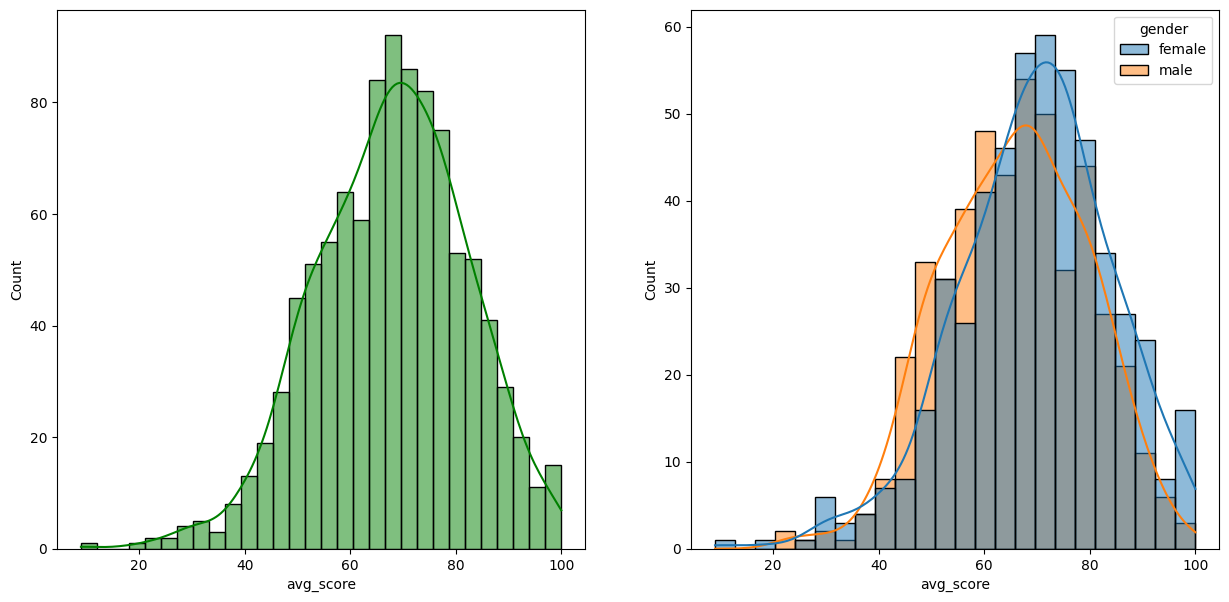

In [33]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = "avg_score", bins = 30, kde = True, color = "g")
plt.subplot(122)
sns.histplot(data = df, x = "avg_score", kde = True, hue = 'gender')
plt.show()

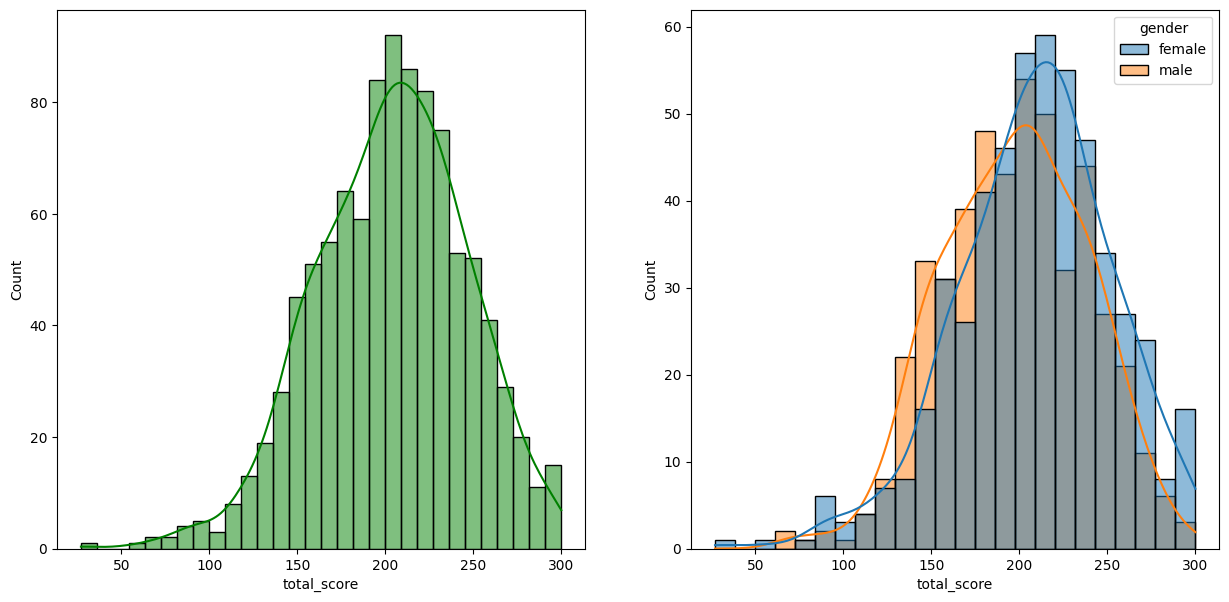

In [35]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = df, x = "total_score", bins = 30, kde = True, color = "g")
plt.subplot(122)
sns.histplot(data = df, x = "total_score", kde = True, hue = 'gender')
plt.show()

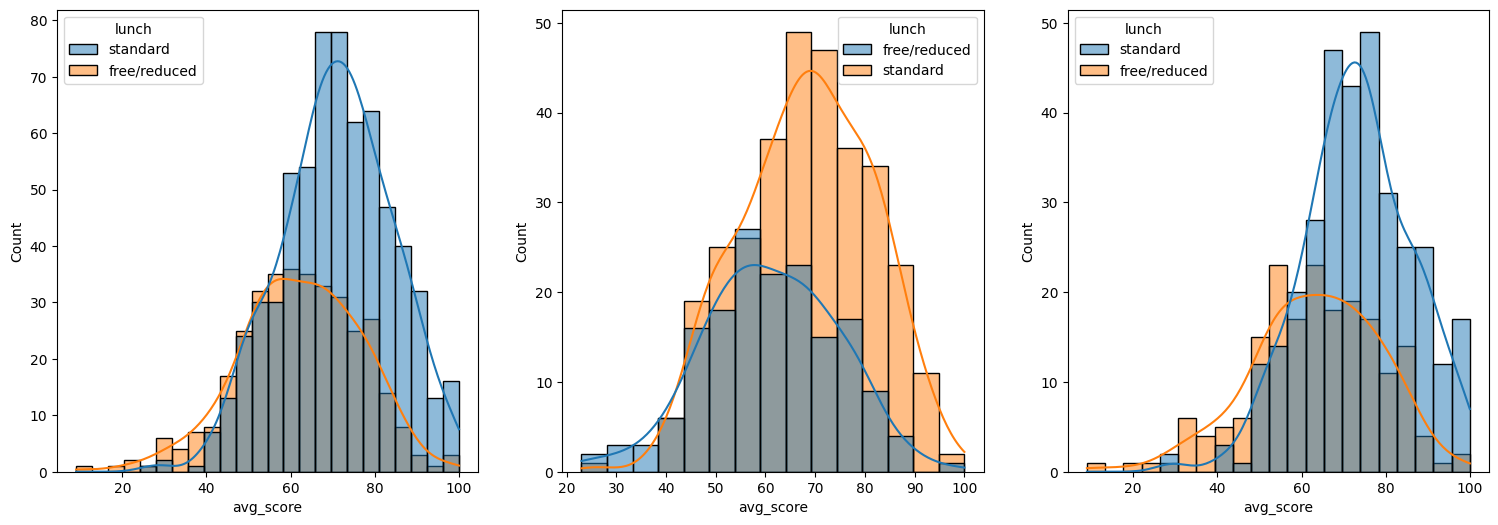

In [40]:
fig, axis = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = "avg_score", kde = True, hue = "lunch", color = "g")
plt.subplot(142)
sns.histplot(data = df[df['gender'] == "male"], x = "avg_score", kde = True, hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == "female"], x = "avg_score", kde = True, hue = 'lunch')
plt.show()

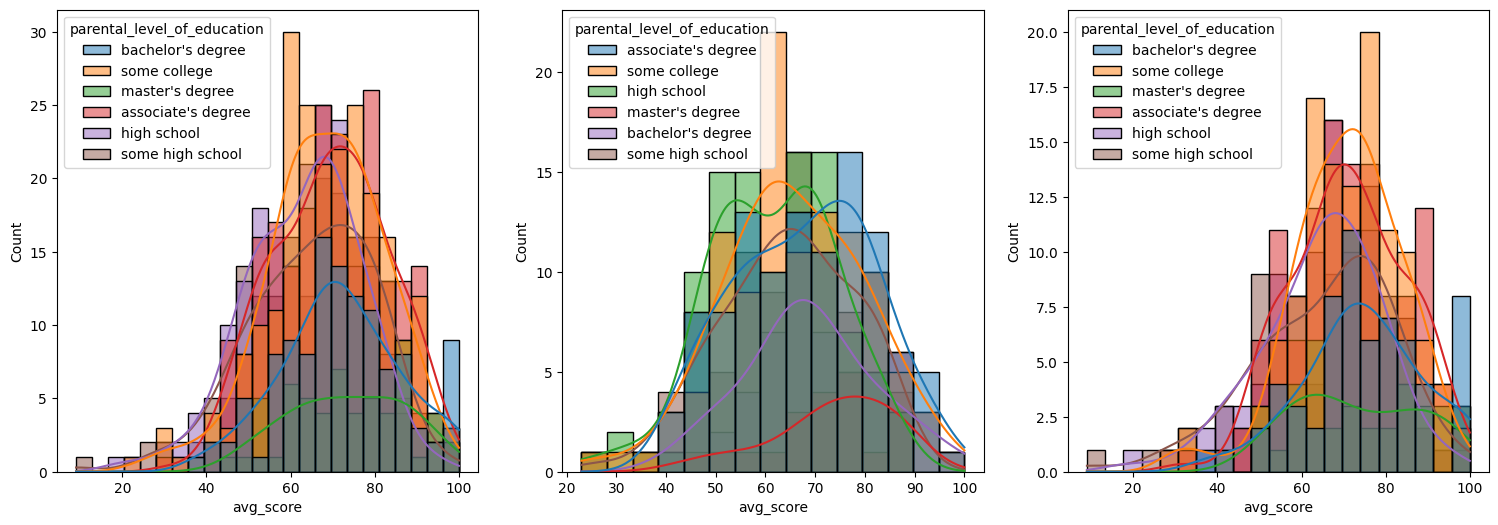

In [41]:
fig, axis = plt.subplots(1, 3, figsize = (25, 6))
plt.subplot(141)
sns.histplot(data = df, x = "avg_score", kde = True, hue = "parental_level_of_education", color = "g")
plt.subplot(142)
sns.histplot(data = df[df['gender'] == "male"], x = "avg_score", kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df['gender'] == "female"], x = "avg_score", kde = True, hue = 'parental_level_of_education')
plt.show()

## Checking outliers

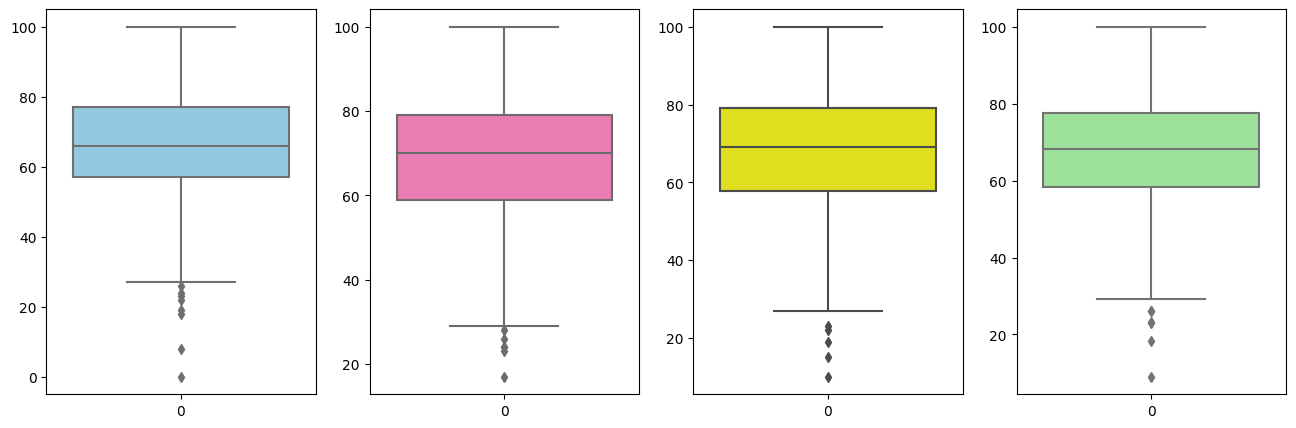

In [44]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()